In [47]:
# import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [48]:
from fktools import *

from sklearn.model_selection import train_test_split

from dist_metric import DistributionOverlap


from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Input, Dense, Dropout

In [49]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [50]:
model = Sequential([
    Input(shape=(8,)),

    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),

    Dense(8, activation="softmax"),
])

model.compile(
    optimizer = Adam(learning_rate=0.0004),
    loss = KLDivergence(),
    metrics=[DistributionOverlap()],
)

# model learning
history = model.fit(
    X_train,
    y_train,
    epochs = 67,
    batch_size = 64,
    validation_split = 0.2,
)

loss, dist_overlap = model.evaluate(
    X_test,
    y_test,
    verbose=0,
)

Epoch 1/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - dist_overlap: 0.6626 - loss: 0.4290 - val_dist_overlap: 0.7787 - val_loss: 0.2086
Epoch 2/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dist_overlap: 0.7670 - loss: 0.2273 - val_dist_overlap: 0.7965 - val_loss: 0.1894
Epoch 3/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dist_overlap: 0.7772 - loss: 0.2143 - val_dist_overlap: 0.7992 - val_loss: 0.1864
Epoch 4/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dist_overlap: 0.7826 - loss: 0.2069 - val_dist_overlap: 0.8009 - val_loss: 0.1867
Epoch 5/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dist_overlap: 0.7855 - loss: 0.2018 - val_dist_overlap: 0.8026 - val_loss: 0.1833
Epoch 6/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dist_overlap: 0.7874 - loss: 0.1999 - val_dist_overlap: 0.8034 - val_loss: 0.1878
Epoch 7/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dist_overlap: 0.7899 - loss: 0.1956 - val_dist_overlap: 0.8063 - val_loss: 0.1787
Epoch 8/67
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

In [51]:
print(f"test loss: {loss}")
print(f"test overlap: {dist_overlap}")

test loss: 0.16857296228408813
test overlap: 0.8205195665359497


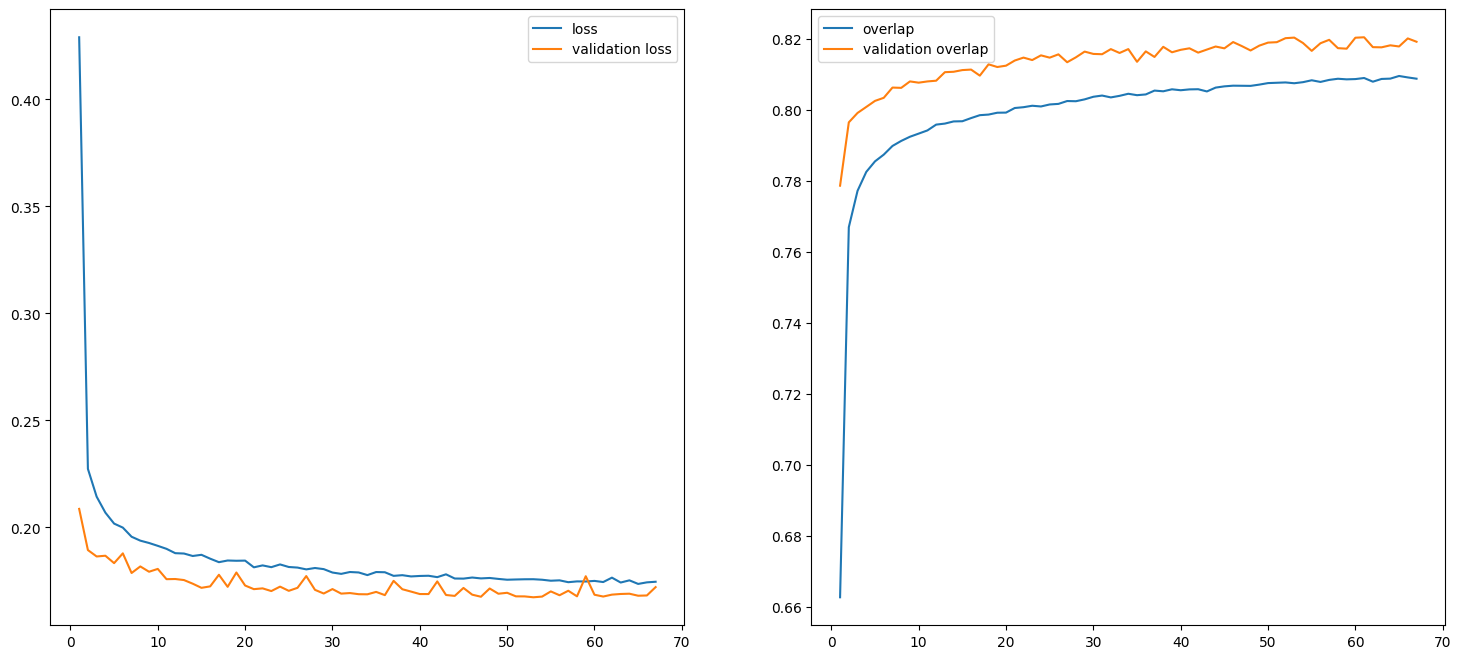

In [52]:
loss = history.history['loss']
acc = history.history['dist_overlap']

val_loss = history.history['val_loss']
val_acc = history.history['val_dist_overlap']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="validation loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
ax[1].plot(epochs, val_acc, label="validation overlap")
ax[1].legend()